#### Import the libraries

In [3]:
import pandas as pd   # data preprocessing
import numpy as np    # mathematical computation
import matplotlib.pyplot as plt  # vizualization
import seaborn as sns  # vizualization

#### Read the dataset

In [5]:
train_df = pd.read_csv('otto_product_train.csv')
test_df = pd.read_csv('otto_product_test.csv')
print(train_df.shape)   # rows - 61878, cols - 95  - (Target variable is present)
print(test_df.shape)    # rows - 144368, cols - 94

(61878, 95)
(144368, 94)


In [6]:
train_df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [7]:
test_df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


In [8]:
print(train_df.columns)

Index(['id', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6',
       'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
       'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42',
       'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48',
       'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54',
       'feat_55', 'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60',
       'feat_61', 'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66',
       'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72',
       'feat_73', 'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78',
       'feat_79', 'feat_80', 'feat_81', 'feat_82', 'fe

### Data Preprocessing

#### 1) Handle the null values

In [10]:
train_nv = train_df.isnull().sum()
train_nv[train_nv>0]

Series([], dtype: int64)

In [11]:
test_nv = test_df.isnull().sum()
test_nv[test_nv>0]

Series([], dtype: int64)

#### Inference
1) There are no null values in the train and the test data.

#### 2) Handle the Duplicates

In [13]:
train_df.duplicated().sum()

0

In [14]:
test_df.duplicated().sum()

0

#### Inference
1) There are no duplicates in train and test data.

#### 3) Checking the data type inconsistencies

In [16]:
train_df.dtypes.value_counts()

int64     94
object     1
dtype: int64

In [17]:
test_df.dtypes.value_counts()

int64    94
dtype: int64

#### 4) Target Variable

In [19]:
train_df['target'].value_counts()

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64

### Correlation

In [20]:
corr = train_df.corr()

#### Representing Features having correlation more than 0.7

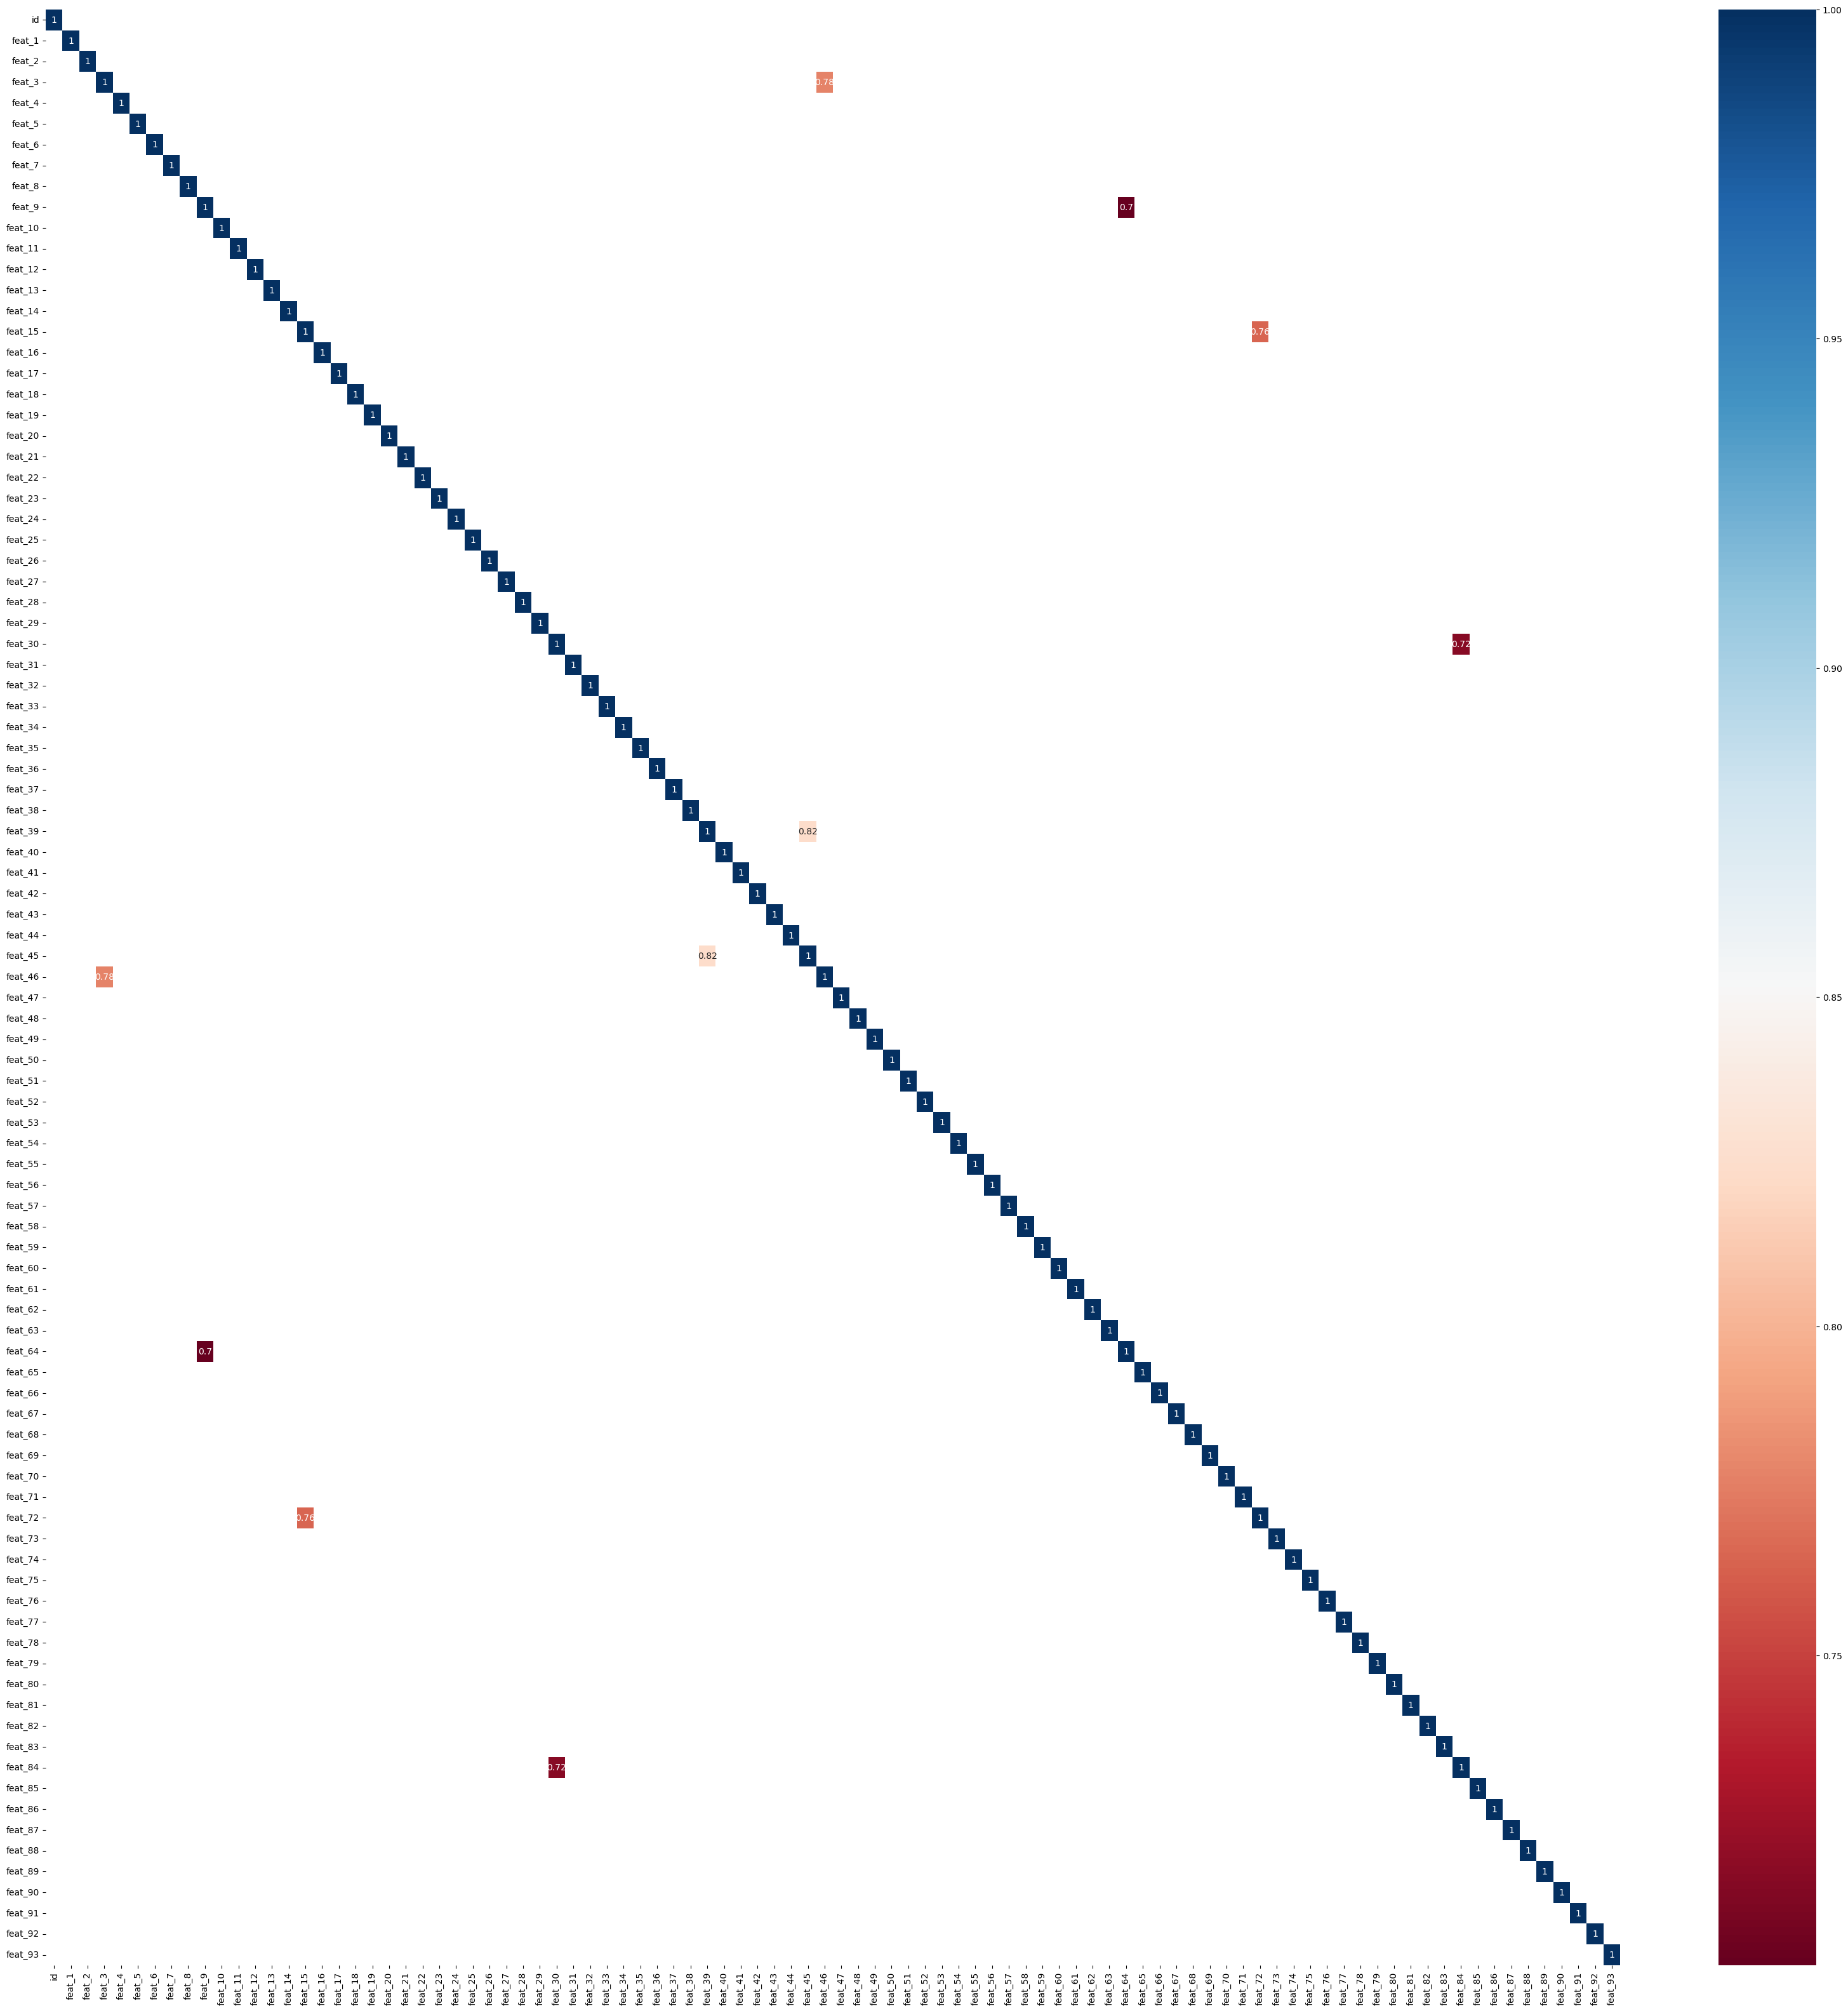

In [22]:
plt.figure(figsize=(40,40))
sns.heatmap(corr[abs(corr)>0.7],annot=True,cmap='RdBu')
plt.show()

### Selecting Dependent and Independent Features

In [25]:
x = train_df.drop(['id','target'],axis=1)
y = train_df['target']
print(type(x))  # DataFrame
print(type(y))  # Series
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(61878, 93)
(61878,)


#### Spitting the data into train and test

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(43314, 93)
(18564, 93)
(43314,)
(18564,)


#### Create Function to evaluate confusion_matrix, classification_report and to generate train and test score

In [30]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [31]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(ytest,ypred))
    print('Test Acc',accuracy_score(ytest,ypred))
    
    
def mscore(model):
    print('Train Score', model.score(x_train,y_train))
    print('Test Score', model.score(x_test,y_test))

#### Importing libraries for ML models

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#### 1) KNN Classifier

In [35]:
knn1 = KNeighborsClassifier(n_neighbors=17)
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [36]:
mscore(knn1)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train Score 0.7958165950962737


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test Score 0.7754255548373196


In [38]:
ypred_knn1 = knn1.predict(x_test)
eval_model(y_test,ypred_knn1)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Confusion Matrix
 [[ 277   23    3    0    5   37   15   82  145]
 [   4 4105  615   24   12    5   23    5    7]
 [   0 1235 1068   22    0    4   23    6    3]
 [   1  439  172  139    6   17   11    0    2]
 [   2   19    1    0  816    0    5    1    1]
 [  40   73    9    6    3 3936   58   86   79]
 [  30  112   80    3    9   51  490   63    8]
 [  49   50   14    0    3   67   31 2223   53]
 [  39   51    3    1    7   59    6   51 1341]]
Classification Report
               precision    recall  f1-score   support

     Class_1       0.63      0.47      0.54       587
     Class_2       0.67      0.86      0.75      4800
     Class_3       0.54      0.45      0.49      2361
     Class_4       0.71      0.18      0.28       787
     Class_5       0.95      0.97      0.96       845
     Class_6       0.94      0.92      0.93      4290
     Class_7       0.74      0.58      0.65       846
     Class_8       0.88      0.89      0.89      2490
     Class_9       0.82      0.86      

#### 2) Decision Tree Classifier

In [49]:
dt1 = DecisionTreeClassifier(criterion='gini',
                             max_depth=17,
                             min_samples_split=20)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=17, min_samples_split=20)

In [50]:
mscore(dt1)

Train Score 0.7575841529297687
Test Score 0.709222150398621


In [51]:
ypred_dt1 = dt1.predict(x_test)
eval_model(y_test,ypred_dt1)

Confusion Matrix
 [[ 101   50    1    0    0   63   25  230  117]
 [  10 4056  456   70    4   45   34  102   23]
 [   4 1464  734   43    0   18   30   59    9]
 [   0  432   75  205    4   33   13   20    5]
 [   0   24    0    0  777    5    0   38    1]
 [  29   89   15   13    0 3857   45  187   55]
 [  17  186   38   12    3   80  318  173   19]
 [  56  103   24    5    3   94   35 2117   53]
 [  62   94    8    6    5  126   13  243 1001]]
Classification Report
               precision    recall  f1-score   support

     Class_1       0.36      0.17      0.23       587
     Class_2       0.62      0.84      0.72      4800
     Class_3       0.54      0.31      0.40      2361
     Class_4       0.58      0.26      0.36       787
     Class_5       0.98      0.92      0.95       845
     Class_6       0.89      0.90      0.90      4290
     Class_7       0.62      0.38      0.47       846
     Class_8       0.67      0.85      0.75      2490
     Class_9       0.78      0.64      

#### 3) RandomForest Classifier

In [64]:
rf1 = RandomForestClassifier(n_estimators=100,criterion='gini',
                             max_depth=25,min_samples_split=30)
rf1.fit(x_train,y_train)

RandomForestClassifier(max_depth=25, min_samples_split=30)

In [65]:
mscore(rf1)

Train Score 0.8473241907928153
Test Score 0.7811893988364577


In [56]:
ypred_rf1 = rf1.predict(x_test)
eval_model(y_test,ypred_rf1)

Confusion Matrix
 [[   9   80    0    0    1   81    3  250  163]
 [   0 4638  116    2    7   13    4   18    2]
 [   0 2023  302    7    0    8    1   17    3]
 [   0  644    8   94    4   37    0    0    0]
 [   0   47    0    0  785    3    0    9    1]
 [   0  113    0    0    0 4004   18  105   50]
 [   0  313   11    7    2   94  205  203   11]
 [   0   77    1    0    1   89    0 2293   29]
 [   0  135    0    0    4  123    0  127 1169]]
Classification Report
               precision    recall  f1-score   support

     Class_1       1.00      0.02      0.03       587
     Class_2       0.57      0.97      0.72      4800
     Class_3       0.69      0.13      0.22      2361
     Class_4       0.85      0.12      0.21       787
     Class_5       0.98      0.93      0.95       845
     Class_6       0.90      0.93      0.92      4290
     Class_7       0.89      0.24      0.38       846
     Class_8       0.76      0.92      0.83      2490
     Class_9       0.82      0.75      

#### 4) AdaBoost Classifier

In [59]:
adab1 = AdaBoostClassifier(n_estimators=90)
adab1.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=90)

In [60]:
mscore(adab1)

Train Score 0.6900540241030614
Test Score 0.688375350140056


In [62]:
ypred_adab1 = adab1.predict(x_test)
eval_model(y_test,ypred_adab1)

Confusion Matrix
 [[ 153   15    3    2    6   71   40  151  146]
 [  10 3765  567  229   41   18   79   81   10]
 [   3 1396  580  143   16   12  138   65    8]
 [   2  373   91  248    6   27   36    2    2]
 [   1   20    0    1  811    2    2    4    4]
 [  47   44    7   23    1 3940   53   96   79]
 [  40  110   56    9    7  118  385  102   19]
 [ 114   35    8    1    3  231   88 1846  164]
 [ 190   56    2    3    4  105   10  137 1051]]
Classification Report
               precision    recall  f1-score   support

     Class_1       0.27      0.26      0.27       587
     Class_2       0.65      0.78      0.71      4800
     Class_3       0.44      0.25      0.32      2361
     Class_4       0.38      0.32      0.34       787
     Class_5       0.91      0.96      0.93       845
     Class_6       0.87      0.92      0.89      4290
     Class_7       0.46      0.46      0.46       846
     Class_8       0.74      0.74      0.74      2490
     Class_9       0.71      0.67      

### Inference
1) RF is the best performing model out of KNN, DT, RF and Adaboost. 

### PCA

In [63]:
from sklearn.decomposition import PCA

In [66]:
pca = PCA(n_components=10)

pcomps_train = pca.fit_transform(x_train)
pcomps_test = pca.transform(x_test)

print(pcomps_train.shape)
print(pcomps_test.shape)

(43314, 10)
(18564, 10)


#### Applying RF on PCA results

In [67]:
rf2 = RandomForestClassifier(n_estimators=100,criterion='gini',
                             max_depth=25,min_samples_split=30)
rf2.fit(pcomps_train,y_train)

RandomForestClassifier(max_depth=25, min_samples_split=30)

In [68]:
print('Train Score',rf2.score(pcomps_train,y_train))
print('Test Score',rf2.score(pcomps_test,y_test))

# Over fit Model

Train Score 0.8287620630742947
Test Score 0.7175177763413058


In [69]:
ypred_rf2 = rf2.predict(pcomps_test)
eval_model(y_test,ypred_rf2)

Confusion Matrix
 [[  47   22    4    0    6   90   25  232  161]
 [   1 4105  558   14   14   15   32   39   22]
 [   0 1417  849    7    1   16   32   33    6]
 [   2  511  174   47    2   20   14    7   10]
 [   0   24    7    0  744   22   13   33    2]
 [   7   67    9    0   19 3794   59  197  138]
 [   2  118   64    2    7   68  423  145   17]
 [  13   47   11    2   13  212   30 2091   71]
 [  14   44    2    0    1  100    6  171 1220]]
Classification Report
               precision    recall  f1-score   support

     Class_1       0.55      0.08      0.14       587
     Class_2       0.65      0.86      0.74      4800
     Class_3       0.51      0.36      0.42      2361
     Class_4       0.65      0.06      0.11       787
     Class_5       0.92      0.88      0.90       845
     Class_6       0.87      0.88      0.88      4290
     Class_7       0.67      0.50      0.57       846
     Class_8       0.71      0.84      0.77      2490
     Class_9       0.74      0.78      

#### Train the entire Data on the best performing model

In [71]:
rf1.fit(x,y)

RandomForestClassifier(max_depth=25, min_samples_split=30)

In [72]:
print('Train Score',rf1.score(x,y))

Train Score 0.8499466692523999


In [73]:
test_df.shape

(144368, 94)

In [75]:
test_df1 = test_df.copy()

In [76]:
test_df.drop('id',axis=1,inplace=True)
test_df.shape

(144368, 93)

#### Generating Prediction results for test data

In [78]:
ypred_test_df = rf1.predict(test_df)
print(len(ypred_test_df))

144368


#### Generating the submission File

In [79]:
submission = pd.DataFrame({'ID':test_df1['id'],'Prediction':ypred_test_df})
submission.head(20)

,ID,Prediction
0,1,Class_4
1,2,Class_6
2,3,Class_6
3,4,Class_2
4,5,Class_9
5,6,Class_3
6,7,Class_8
7,8,Class_2
8,9,Class_3
9,10,Class_2


In [80]:
submission['Prediction'].value_counts()

Class_2    52514
Class_6    33572
Class_8    22005
Class_9    11960
Class_3    10009
Class_5     6160
Class_7     4360
Class_4     2355
Class_1     1433
Name: Prediction, dtype: int64

#### Save this submission File

In [81]:
submission.to_csv('submission_otto_product_cls_9Apr.csv')

#### Save the Model

In [82]:
import pickle

In [84]:
pickle.dump(rf1,open('otto_product_cls_rf1.pkl','wb'))  # wb = write binary

#### Load the saved model

In [85]:
model = pickle.load(open('otto_product_cls_rf1.pkl','rb'))  # rb = read binary

In [86]:
test_df[:5]

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
1,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0


In [88]:
pred_top5_test = model.predict(test_df[:5])
pred_top5_test

array(['Class_4', 'Class_6', 'Class_6', 'Class_2', 'Class_9'],
      dtype=object)